In [46]:
import sys
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [47]:
# random dataset all comparisons
def comparisons_random(array_num, elem_range, algorithm):
    all_comparisons = []
    
    for i in range(array_num):
        dataset = [random.choice(range(elem_range)) for j in range(i+1)]
        all_comparisons.append( algorithm(dataset) )
        
    return all_comparisons

# dataset sorted comparisons
def comparisons_sorted(array_num, elem_range, algorithm):
    all_comparisons = []
    
    for i in range(array_num):
        dataset = [random.choice(range(elem_range)) for j in range(i+1)]
        dataset.sort()
        all_comparisons.append( algorithm(dataset) )
        
    return all_comparisons

# dataset reverse sorted comparisons
def comparisons_reverse(array_num, elem_range, algorithm):
    all_comparisons = []
    
    for i in range(array_num):
        dataset = [random.choice(range(elem_range)) for j in range(i+1)]
        dataset.sort(reverse=True)
        all_comparisons.append( algorithm(dataset) )
        
    return all_comparisons

In [48]:
def plot_graphs(a, b, c, label, title):
    plt.rc('figure', figsize=(6.0, 5.0))
    a, = plt.plot(a, color = "r", marker = ">", label = label[0], linewidth = 7)
    b, = plt.plot(b, color = "g", marker = "x", label = label[1], linewidth = 5)
    c, = plt.plot(c, color = "b", marker = "d", label = label[2], linewidth = 0.9)
    plt.legend([a, b, c], [label[0], label[1], label[2]])
    plt.ylabel('Number of Comparisons')
    plt.xlabel('Size of Arrays')
    plt.title(title)
    plt.show()
    
def compare_graphs(a, b, label, title):
    plt.rc('figure', figsize=(6.0, 5.0))
    a, = plt.plot(a, color = "r", label = label[0], linewidth = 1)
    b, = plt.plot(b, color = "b", label = label[1], linewidth = 1)
    plt.legend([a, b], [label[0], label[1]])
    plt.ylabel('Number of Comparisons')
    plt.xlabel('Size of Arrays')
    plt.title(title)
    plt.show()
    
def show_graphs(a, label, title):
    plt.rc('figure', figsize=(6.0, 5.0))
    a, = plt.plot(a, color = "r", label = label, linewidth = 1)
    plt.legend([a], [label])
    plt.ylabel('Number of Comparisons')
    plt.xlabel('Size of Arrays')
    plt.title(title)
    plt.show()



# O(n^2) algorithms (selection, bubble, insertion)

In [49]:
def Selection_Sort(dataset):
    comp_count = 0
    for i in range(len(dataset)):
        
        min_idx = i
        for j in range(i+1, len(dataset)):
            comp_count += 1
            if dataset[min_idx] > dataset[j]:
                min_idx = j
                     
        dataset[i], dataset[min_idx] = dataset[min_idx], dataset[i]
        
    return comp_count

In [50]:
def Bubble_Sort(dataset):
    n = len(dataset)
    comp_count = 0
    swapped = False

    for i in range(n):
        swapped = False
            
        for j in range(0, n-i-1):
 
            comp_count += 1
            if dataset[j] > dataset[j+1] :
                swapped = True
                dataset[j], dataset[j+1] = dataset[j+1], dataset[j]
                
        if not swapped:
            break
                
    return comp_count

In [51]:
def Insertion_Sort(dataset, gap = 1):
    comp_count = 0

    for i in range(gap, len(dataset)):
 
        key = dataset[i]
        j = i
        
        while j >= gap and key < dataset[j-gap] :
            comp_count += 1
            dataset[j] = dataset[j-gap]
            j -= gap
        
        comp_count += 1
        dataset[j] = key
        
    return comp_count

In [52]:
# all selection sort
sel_u = comparisons_random(50, 100, Selection_Sort)    
sel_s = comparisons_sorted(50, 100, Selection_Sort)
sel_r = comparisons_reverse(50, 100, Selection_Sort)

# all bubble sort
bub_u = comparisons_random(50, 100, Bubble_Sort)    
bub_s = comparisons_sorted(50, 100, Bubble_Sort)
bub_r = comparisons_reverse(50, 100, Bubble_Sort)

# all insertion sort
ins_u = comparisons_random(50, 100, Insertion_Sort)    
ins_s = comparisons_sorted(50, 100, Insertion_Sort)
ins_r = comparisons_reverse(50, 100, Insertion_Sort)


### Best Case Comparison (Sorted Sequences)

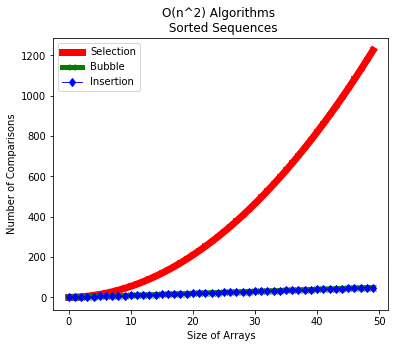

In [53]:
plot_graphs(sel_s, bub_s, ins_s, ["Selection", "Bubble", "Insertion"], "O(n^2) Algorithms \n Sorted Sequences")

### Worst Case Comparison (Reverse Sorted Sequences)

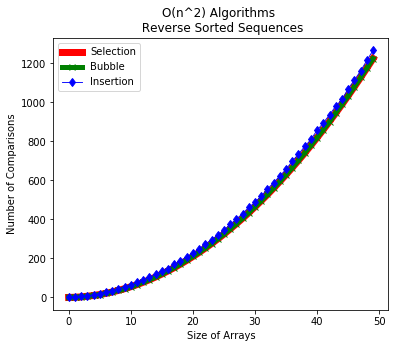

In [54]:
plot_graphs(sel_r, bub_r, ins_r, ["Selection", "Bubble", "Insertion"], "O(n^2) Algorithms \n Reverse Sorted Sequences")

### Average Case Comparison (Random Numbers)

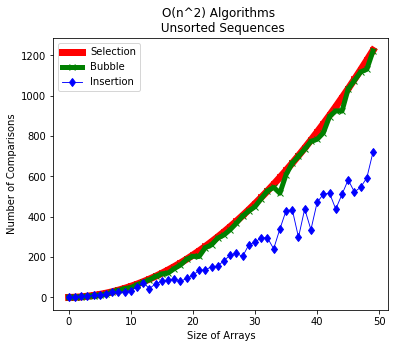

In [55]:
plot_graphs(sel_u, bub_u, ins_u, ["Selection", "Bubble", "Insertion"], "O(n^2) Algorithms \n Unsorted Sequences")

# Shell Sort Optimization

## Insertion sort vs shell sort with insertion sort as subroutine

In [56]:
def Shell_Sort(dataset):
    gap = len(dataset)/2
    comp_count = 0
    while gap > 0:
        comp_count += Insertion_Sort(dataset, gap) # not sure yet if with middle -gap
        gap /= 2
        
    return comp_count

# all shell sort
shl_u = comparisons_random(300, 100, Shell_Sort)    
shl_s = comparisons_sorted(300, 100, Shell_Sort)
shl_r = comparisons_reverse(300, 100, Shell_Sort)

shins_u = comparisons_random(300, 100, Insertion_Sort)    
shins_s = comparisons_sorted(300, 100, Insertion_Sort)
shins_r = comparisons_reverse(300, 100, Insertion_Sort)

### Sorted Sequences

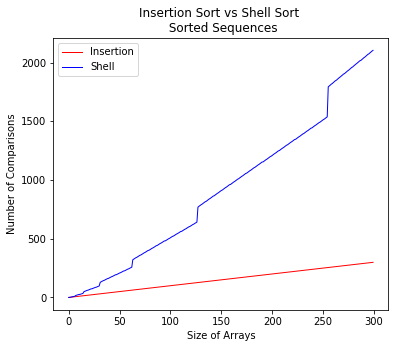

In [57]:
compare_graphs(shins_s, shl_s, ["Insertion", "Shell"], "Insertion Sort vs Shell Sort \n Sorted Sequences");

### Reverse Sorted Sequences

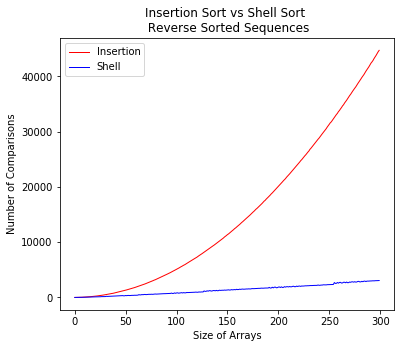

In [58]:
compare_graphs(shins_r, shl_r, ["Insertion", "Shell"], "Insertion Sort vs Shell Sort \n Reverse Sorted Sequences");

### Random Numbers

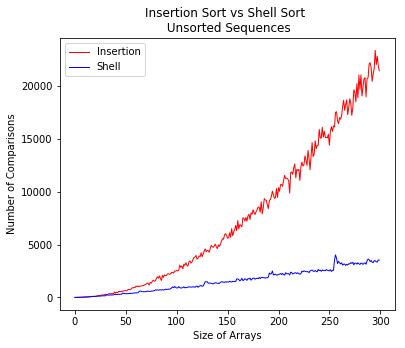

In [59]:
compare_graphs(shins_u, shl_u, ["Insertion", "Shell"], "Insertion Sort vs Shell Sort \n Unsorted Sequences");

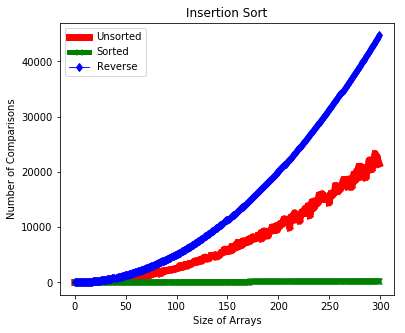

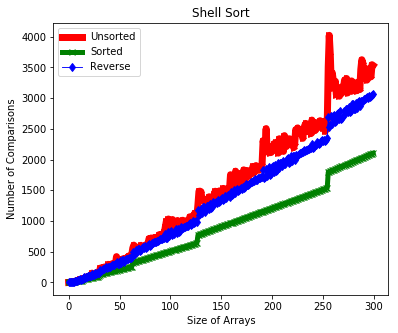

In [60]:
plot_graphs(shins_u, shins_s, shins_r, ["Unsorted", "Sorted", "Reverse"], "Insertion Sort")
plot_graphs(shl_u, shl_s, shl_r, ["Unsorted", "Sorted", "Reverse"], "Shell Sort")

## Insertion sort using different gaps (random numbers)

In [61]:
def Shell_Sort_Ciura(dataset):
    sequence = [701, 301, 132, 57, 23, 10, 4, 1]
    comp_count = 0
    
    for gap in sequence:
        comp_count += Insertion_Sort(dataset, gap)
        
    return comp_count

cishl_u = comparisons_random(300, 100, Shell_Sort_Ciura)    
cishl_s = comparisons_sorted(300, 100, Shell_Sort_Ciura)
cishl_r = comparisons_reverse(300, 100, Shell_Sort_Ciura)

### Shell's gaps vs. Ciura's gaps

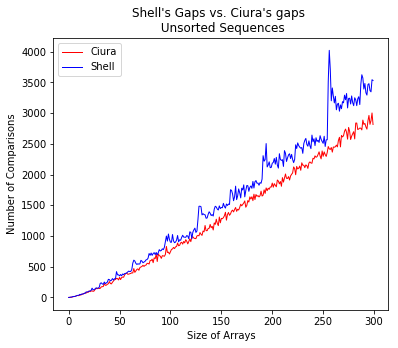

In [62]:
compare_graphs(cishl_u, shl_u, ["Ciura", "Shell"], "Shell's Gaps vs. Ciura's gaps \n Unsorted Sequences");

# Bucket Sort

In [70]:
def normal_distribution(limit):
    loc, scale = 10, 1
    dataset = np.random.logistic(0, 12, limit)
    return dataset.tolist()

def centered_distribution(limit):
    loc, scale = 10, 1
    dataset = np.random.logistic(0, 3, limit)
    return dataset.tolist()

def uniform_distribution(limit):
    dataset = np.random.normal(0, 10, limit)
    return dataset.tolist()

def plot_bucketsort(a, b, c, label, table_title, distribute, size):
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 4
    
    plt.subplot(121)
    a, = plt.plot(a, color = "r", label=label[0], linewidth = 1)
    b, = plt.plot(b, color = "g", label=label[1], linewidth = 1)
    c, = plt.plot(c, color = "b", label=label[2], linewidth = 1)
    
    plt.legend([a, b, c], ["Unsorted", "Sorted", "Reverse Sorted"])
    
    plt.ylim(0, 140000)
    
    plt.ylabel('Number of Comparisons')
    plt.xlabel('Size of Arrays')
    
 
    dataset = distribute(size)
    plt.subplot(122)
    bin_t = int(np.std(dataset) * math.sqrt(len(dataset)))
    if(bin_t == 0):
        bin_t = 1
    plt.hist(dataset, bins = bin_t)

    plt.xlim(-50, 50)
    plt.ylim(0, 50)
    plt.rcParams["figure.figsize"] = fig_size
    plt.ylabel('Frequency')
    plt.xlabel('Distribution')    
    
    plt.suptitle(table_title)  
    plt.show()

def different_distribution_comp(limit, algorithm, distribute, kind = 0, ):
    all_comparisons = []
    dataset = []
    for x in range(1, limit+1):
        dataset = distribute(x)
        if kind == 1:
            dataset.sort()
        if kind == 2:
            dataset.sort(reverse = True)
        all_comparisons.append(Bucket_Sort(10, dataset))
    
    return all_comparisons

def Bucket_Sort(bucket_size, dataset):
    if(bucket_size == 0):
        bucket_size = 1
    
    comp_count = 0
    if(len(dataset) == 0):
        print('Dataset is empty.')

    minnum = dataset[0]
    maxnum = dataset[0]

    # For finding minimum and maximum values
    for i in range(0, len(dataset)):
        comp_count += 1
        if dataset[i] < minnum:
            minnum = dataset[i]
        elif dataset[i] > maxnum:
            maxnum = dataset[i]

    # Initialize buckets
    num_of_buckets = int(math.floor((maxnum - minnum) / bucket_size) + 1)
    buckets = []
    for i in range(0, num_of_buckets):
        buckets.append([])

    # For putting values in buckets
    for i in range(0, len(dataset)):
        buckets[int(math.floor((dataset[i] - minnum) / bucket_size))].append(dataset[i])

    # Sort buckets and place back into input array
    sorted_dataset = []
    for i in range(0, len(buckets)):
        comp_count += Insertion_Sort(buckets[i])
        for j in range(0, len(buckets[i])):
            sorted_dataset.append(buckets[i][j])
    
    return comp_count


### Bucket sort on different distributions (use insertion sort as subroutine)

In [ ]:
# unsorted

arr_size = 1000

buck_nu = different_distribution_comp(arr_size, Bucket_Sort, normal_distribution, kind = 0)
buck_uu = different_distribution_comp(arr_size, Bucket_Sort, uniform_distribution, kind = 0)
buck_cu = different_distribution_comp(arr_size, Bucket_Sort, centered_distribution, kind = 0)

# sorted
buck_ns = different_distribution_comp(arr_size, Bucket_Sort, normal_distribution, kind = 1)
buck_us = different_distribution_comp(arr_size, Bucket_Sort, uniform_distribution, kind = 1)
buck_cs = different_distribution_comp(arr_size, Bucket_Sort, centered_distribution, kind = 1)

# reverse sorted
buck_nr = different_distribution_comp(arr_size, Bucket_Sort, normal_distribution, kind = 2)
buck_ur = different_distribution_comp(arr_size, Bucket_Sort, uniform_distribution, kind = 2)
buck_cr = different_distribution_comp(arr_size, Bucket_Sort, centered_distribution, kind = 2)

plot_bucketsort(buck_nu, buck_ns, buck_nr, ["Unsorted", "Sorted", "Reverse Sorted"],  "Bucket Sort \n Normal Distribution", normal_distribution, arr_size)
plot_bucketsort(buck_uu, buck_us, buck_ur, ["Unsorted", "Sorted", "Reverse Sorted"], "Bucket Sort \n Uniform Distribution", uniform_distribution, arr_size)
plot_bucketsort(buck_cu, buck_cs, buck_cr, ["Unsorted", "Sorted", "Reverse Sorted"], " Bucket Sort \n Centered Distribution", centered_distribution, arr_size)

# Radix sort optimization

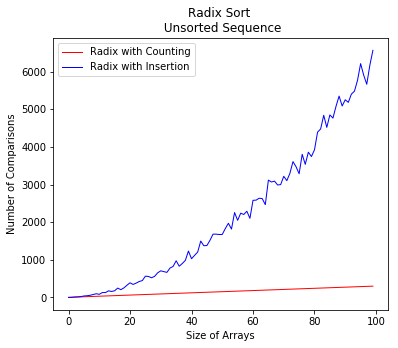

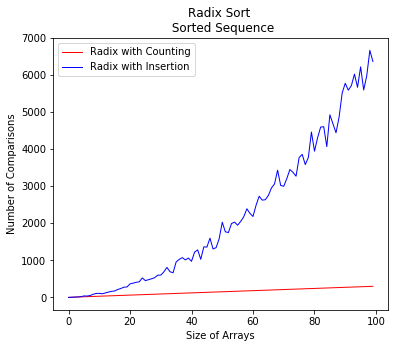

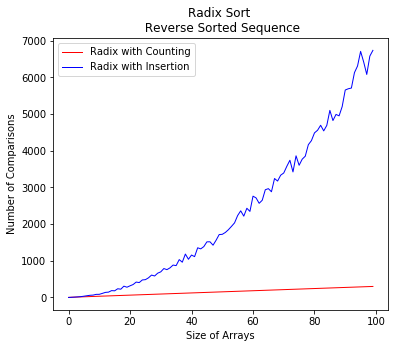

In [74]:
counter = 0 
def Counting_Sort(arr, exp1):
    n = len(arr)
    global counter

    output = [0] * (n)
    count = [0] * (10) 
 
    for i in range(0, n):
        index = int((arr[i]/exp1))                 
        counter += 1                               
        count[ (index)%10 ] += 1
 
    for i in range(1,10):
        count[i] += count[i-1]      
 

    i = n-1
    while i>=0:
        index = int((arr[i]/exp1))
        output[ count[ (index)%10 ] - 1] = arr[i] 
        count[ (index)%10 ] -= 1
        i -= 1
 
    i = 0
    for i in range(0,len(arr)):
        arr[i] = output[i]                      

def Radix_Sort(arr):
    global counter
    counter = 0

    maxnum = max(arr)                             
    exp = 1                             
    
    while maxnum/exp > 0:
        Counting_Sort(arr,exp)                   
        exp *= 10               
    return counter

#################################################

def Sub_Insertion_Sort(dataset, exp1):
    comp_count = 0

    for i in range(1, len(dataset)):
 
        key = dataset[i]
        j = i
        
        while j >= 1 and (key/exp1)%10 < (dataset[j-1]/exp1)%10 :
            comp_count += 1
            dataset[j] = dataset[j-1]
            j -= 1
        
        comp_count += 1
        dataset[j] = key
        
    return comp_count
        
# Radix Sort with Insertion Sort
def I_Radix_Sort(dataset):
    max1 = max(dataset)
    comp_count = 0

    exp = 1
    while max1/exp > 0:
        comp_count += Sub_Insertion_Sort(dataset,exp)
        exp *= 10
    
    return comp_count

crad_u = comparisons_random(100, 300, Radix_Sort)
crad_s = comparisons_sorted(100, 300, Radix_Sort)
crad_r = comparisons_reverse(100, 300, Radix_Sort)

irad_u = comparisons_random(100, 300, I_Radix_Sort)
irad_s = comparisons_sorted(100, 300, I_Radix_Sort)
irad_r = comparisons_reverse(100, 300, I_Radix_Sort)

compare_graphs(crad_u, irad_u, ["Radix with Counting", "Radix with Insertion"], "Radix Sort \n Unsorted Sequence")
compare_graphs(crad_s, irad_s, ["Radix with Counting", "Radix with Insertion"], "Radix Sort \n Sorted Sequence")
compare_graphs(crad_r, irad_r, ["Radix with Counting", "Radix with Insertion"], "Radix Sort \n Reverse Sorted Sequence")



# Merge Sort vs Quick Sort

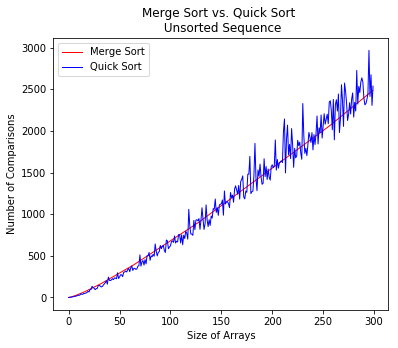

In [66]:
# -Merge sort vs Quick Sort

# random dataset all comparisons
def comparisons_random_m(array_num, elem_range, algorithm):
    all_comparisons = []
    
    for i in range(array_num):
        dataset = [random.choice(range(elem_range)) for j in range(i+1)]
        all_comparisons.append( algorithm(dataset)[1] )
        
    return all_comparisons

def MergeSort(dataset):
    intNumOfComp = 0

    if len(dataset)>1:
        intMidValue = len(dataset)//2
        listLeftHalf = dataset[:intMidValue]
        listRightHalf = dataset[intMidValue:]

        left_part = MergeSort(listLeftHalf)
        right_part = MergeSort(listRightHalf)

        intNumOfComp += left_part[1] + right_part[1]

        i=0
        j=0
        k=0
        while i < len(listLeftHalf) and j < len(listRightHalf):
            intNumOfComp += 1
            if listLeftHalf[i] < listRightHalf[j]:
                dataset[k]=listLeftHalf[i]
                i =i+1

            else:
                dataset[k]=listRightHalf[j]
                j=j+1

            k=k+1

        while i < len(listLeftHalf):
            dataset[k]=listLeftHalf[i]
            i=i+1
            k=k+1
            intNumOfComp += 1

        while j < len(listRightHalf):
            dataset[k]=listRightHalf[j]
            j=j+1
            k=k+1
            intNumOfComp += 1

    return dataset, intNumOfComp


def partition(dataset, start, end):
    comp_count = 0
    pos = start
    for i in xrange(start, end):
        comp_count += 1
        
        if dataset[i] < dataset[end]:
            dataset[i], dataset[pos] = dataset[pos], dataset[i]
            pos += 1
    dataset[pos], dataset[end] = dataset[end], dataset[pos]
    return pos, comp_count

def Quick_Sort_rec(dataset, start, end):
    comp_count = 0
    if start < end:
        pos, comp_count = partition(dataset, start, end)        
        comp_count += Quick_Sort_rec(dataset, start, pos - 1)
        comp_count += Quick_Sort_rec(dataset, pos + 1, end)
    return comp_count

def Quick_Sort(dataset, start=None, end=None):
    if start is None:
        start = 0
    if end is None:
        end = len(dataset) - 1
    return Quick_Sort_rec(dataset, start, end)



quic_u = comparisons_random(300, 1000, Quick_Sort)
merg_u = comparisons_random_m(300, 1000, MergeSort)

compare_graphs(merg_u, quic_u, ["Merge Sort", "Quick Sort"], "Merge Sort vs. Quick Sort \n Unsorted Sequence");
